In [126]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import seaborn as sns
import cv2 as cv

%matplotlib inline

import PIL

In [101]:
input_path = "SomiteTraceLibrary/input/images/"
im = imread(input_path + "2020_02_15_R3_mem-054.tif")
im.flatten()

array([22, 23, 25, ..., 16, 37, 39], dtype=uint8)

In [102]:
from glob import iglob
membranes = pd.DataFrame([])
lens = []
for path in iglob('./SomiteTraceLibrary/input/images/*'):
    img = imread(path)[0:128, 0:128]
    flat = pd.Series(scale(img.flatten()), name=path)
    membranes = membranes.append(flat)

In [103]:
membranes

0         1      \
./SomiteTraceLibrary/input/images/2020_02_15_R3...  0.778785  0.883609   
./SomiteTraceLibrary/input/images/2020_02_10_R3... -0.038994  1.170478   
./SomiteTraceLibrary/input/images/2020_02_08_R3... -0.252489  0.815617   
./SomiteTraceLibrary/input/images/2020_02_13_L3...  1.433734  0.716035   
./SomiteTraceLibrary/input/images/2020_02_05_R3...  1.146636  0.319664   
...                                                      ...       ...   
./SomiteTraceLibrary/input/images/2020_02_10_R3... -0.607464  1.226639   
./SomiteTraceLibrary/input/images/2020_02_05_L3... -1.109004 -0.986762   
./SomiteTraceLibrary/input/images/2020_02_07_L3... -0.253426 -0.853296   
./SomiteTraceLibrary/input/images/2020_02_15_R3...  1.025847  0.143773   
./SomiteTraceLibrary/input/images/2020_02_10_L3... -0.777652 -0.777652   

                                                       2         3      \
./SomiteTraceLibrary/input/images/2020_02_15_R3...  1.093255  1.198079   
./SomiteTraceLibrary/input/images/2020_02_10_R3...  0.901706  0.767321   
./SomiteTraceLibrary/input/images/2020_02_08_R3... -0.710248  1.120790   
./SomiteTraceLibrary/input/images/2020_02_13_L3...  0.818563  1.536263   
./SomiteTraceLibrary/input/images/2020_02_05_R3... -0.341913  0.236967   
...                                                      ...       ...   
./SomiteTraceLibrary/input/images/2020_02_10_R3... -0.184209  0.097960   
./SomiteTraceLibrary/input/images/2020_02_05_L3... -1.047883 -1.109004   
./SomiteTraceLibrary/input/images/2020_02_07_L3... -0.296274 -0.681905   
./SomiteTraceLibrary/input/images/2020_02_15_R3...  1.760909  1.025847   
./SomiteTraceLibrary/input/images/2020_02_10_L3... -0.976061 -0.678447   

                                                       4         5      \
./SomiteTraceLibrary/input/images/2020_02_15_R3... -0.269448  1.407725   
./SomiteTraceLibrary/input/images/2020_02_10_R3...  0.632935  0.229778   
./SomiteTraceLibrary/input/images/2020_02_08_R3...  0.052684  0.663031   
./SomiteTraceLibrary/input/images/2020_02_13_L3...  1.638792  1.433734   
./SomiteTraceLibrary/input/images/2020_02_05_R3...  0.236967  0.319664   
...                                                      ...       ...   
./SomiteTraceLibrary/input/images/2020_02_10_R3...  0.944469  0.097960   
./SomiteTraceLibrary/input/images/2020_02_05_L3... -1.109004 -0.986762   
./SomiteTraceLibrary/input/images/2020_02_07_L3... -0.767601 -1.024688   
./SomiteTraceLibrary/input/images/2020_02_15_R3...  2.789996  0.143773   
./SomiteTraceLibrary/input/images/2020_02_10_L3... -0.281629 -1.075265   

                                                       6         7      \
./SomiteTraceLibrary/input/images/2020_02_15_R3...  0.883609  0.988432   
./SomiteTraceLibrary/input/images/2020_02_10_R3...  1.708021  0.229778   
./SomiteTraceLibrary/input/images/2020_02_08_R3... -0.862835 -0.557662   
./SomiteTraceLibrary/input/images/2020_02_13_L3...  1.023620  1.331206   
./SomiteTraceLibrary/input/images/2020_02_05_R3... -0.176519 -0.424611   
...                                                      ...       ...   
./SomiteTraceLibrary/input/images/2020_02_10_R3... -0.043125 -0.748548   
./SomiteTraceLibrary/input/images/2020_02_05_L3... -1.047883 -1.047883   
./SomiteTraceLibrary/input/images/2020_02_07_L3... -0.896144 -0.896144   
./SomiteTraceLibrary/input/images/2020_02_15_R3...  1.466884 -0.885313   
./SomiteTraceLibrary/input/images/2020_02_10_L3... -0.777652 -0.678447   

                                                       8         9      ...  \
./SomiteTraceLibrary/input/images/2020_02_15_R3...  0.359492  0.464315  ...   
./SomiteTraceLibrary/input/images/2020_02_10_R3...  0.095392  0.498549  ...   
./SomiteTraceLibrary/input/images/2020_02_08_R3...  0.052684 -0.099902  ...   
./SomiteTraceLibrary/input/images/2020_02_13_L3...  1.126149  1.433734  ...   
./SomiteTraceLibrary/input/images/2020_02_05_R3...  0.319664 -0.176519  ...   
...                      

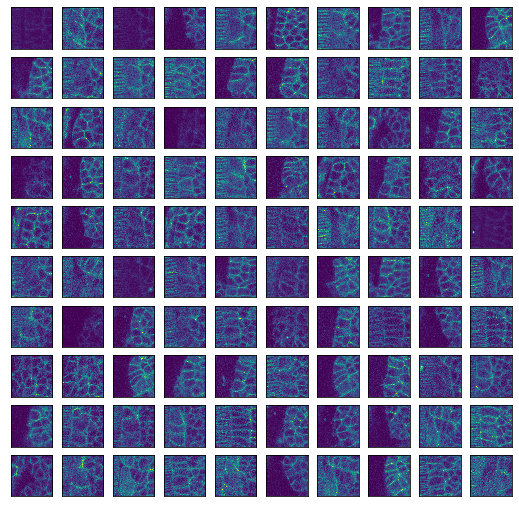

In [104]:
fig, axes = plt.subplots(10,10,figsize=(9,9))
plt.setp(axes, xticks=[], yticks=[])
for i, ax in enumerate(axes.flat):
    ax.imshow(membranes.iloc[i].values.reshape(128,128))

First 20 components/"Eigenvectors"

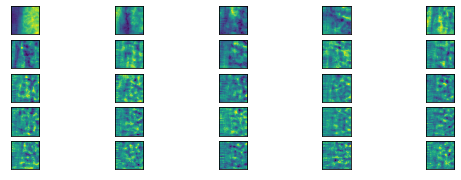

In [105]:
from sklearn.decomposition import PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the original dataset
pca = PCA(n_components=25)
pca.fit(membranes)

fig, axes = plt.subplots(5,5,figsize=(9,3))
plt.setp(axes, xticks=[], yticks=[])
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(128,128))

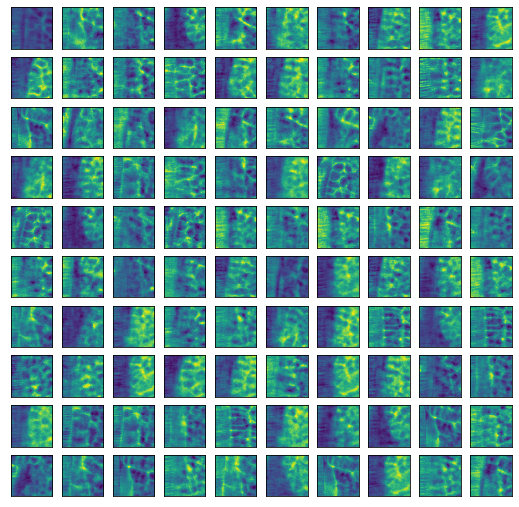

In [106]:
components = pca.transform(membranes)
projected = pca.inverse_transform(components)
fig, axes = plt.subplots(10,10,figsize=(9,9))
plt.setp(axes, xticks=[], yticks=[])
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(128,128))

## Center Crop

In [107]:
membranes_centercrop = pd.DataFrame([])
for path in iglob('./SomiteTraceLibrary/input/images/*'):
    img = imread(path)
    img_c = img[(img.shape[0]//2 - 64):(img.shape[0]//2 + 64),(img.shape[1]//2 - 64):(img.shape[1]//2 + 64)]
    flat = pd.Series(scale(img_c.flatten()), name=path)
    membranes_centercrop = membranes_centercrop.append(flat)

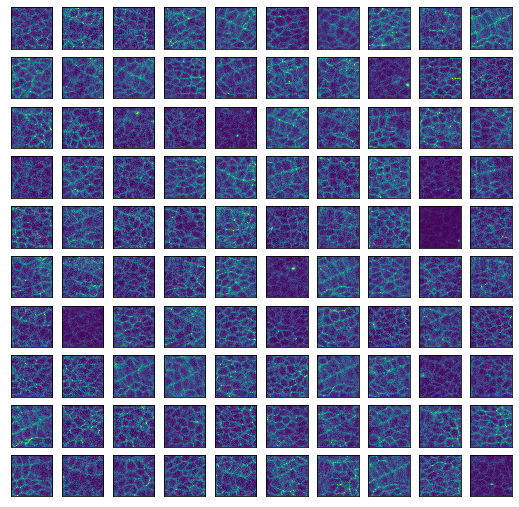

In [108]:
fig, axes = plt.subplots(10,10,figsize=(9,9))
plt.setp(axes, xticks=[], yticks=[])
for i, ax in enumerate(axes.flat):
    ax.imshow(membranes_centercrop.iloc[i].values.reshape(128,128))

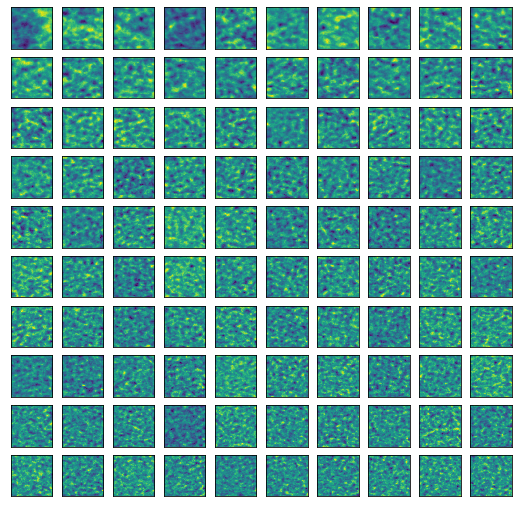

In [122]:
pca_c = PCA(n_components=100)
pca_c.fit(membranes_centercrop)

fig, axes = plt.subplots(10,10,figsize=(9,9))
plt.setp(axes, xticks=[], yticks=[])
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_c.components_[i].reshape(128,128))

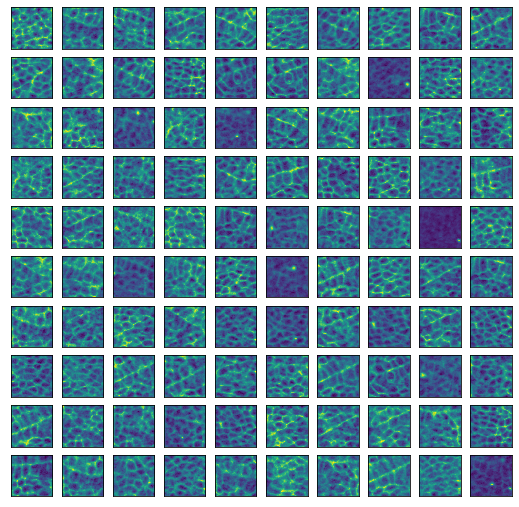

In [123]:
components_c = pca_c.transform(membranes_centercrop)
projected_c = pca_c.inverse_transform(components_c)
fig, axes = plt.subplots(10,10,figsize=(9,9))
plt.setp(axes, xticks=[], yticks=[])
for i, ax in enumerate(axes.flat):
    ax.imshow(projected_c[i].reshape(128,128))

In [125]:
print("Percent of variance explained:", sum(pca_c.explained_variance_ratio_))
sns.

Percent of variance explained: 0.4844405103783876


## PCA on boundaries

In [70]:
input_path = "SomiteTraceLibrary/input/label_btr/"
im = imread(input_path + "2020_02_05_L3_btr-001.tif")
im.flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [111]:
bound_centercrop = pd.DataFrame([])
for path in iglob('./SomiteTraceLibrary/input/label_btr/*'):
    img = imread(path)
    img_c = img[(img.shape[0]//2 - 64):(img.shape[0]//2 + 64),(img.shape[1]//2 - 64):(img.shape[1]//2 + 64)]
    flat = pd.Series(scale(img_c.flatten()), name=path)
    bound_centercrop = bound_centercrop.append(flat)

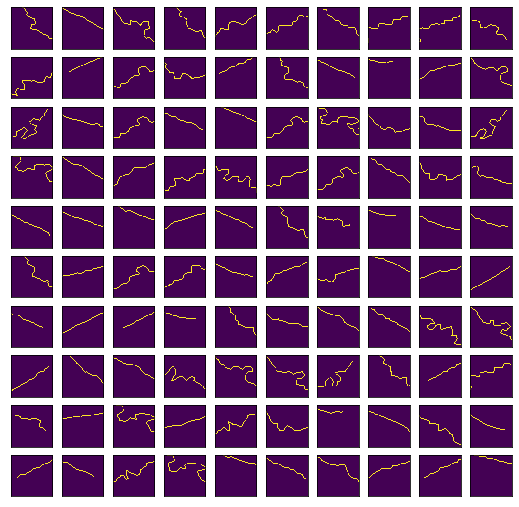

In [112]:
fig, axes = plt.subplots(10,10,figsize=(9,9))
plt.setp(axes, xticks=[], yticks=[])
for i, ax in enumerate(axes.flat):
    ax.imshow(bound_centercrop.iloc[i].values.reshape(128,128))

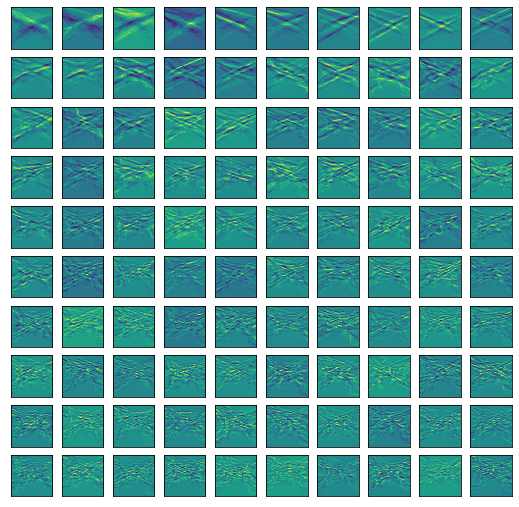

In [127]:
pca_b = PCA(n_components=100)
pca_b.fit(bound_centercrop)

fig, axes = plt.subplots(10,10,figsize=(9,9))
plt.setp(axes, xticks=[], yticks=[])
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_b.components_[i].reshape(128,128))

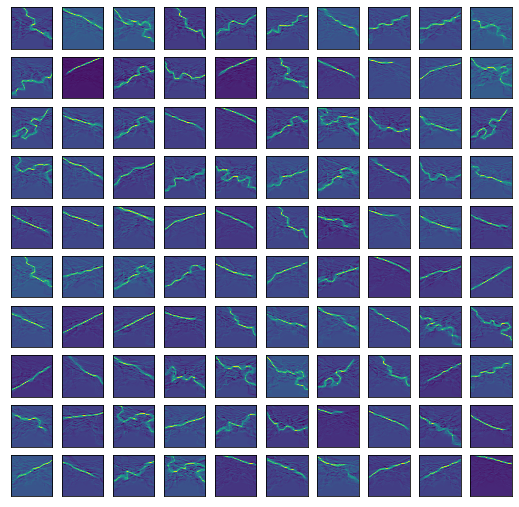

In [128]:
components_b = pca_b.transform(bound_centercrop)
projected_b = pca_b.inverse_transform(components_b)
fig, axes = plt.subplots(10,10,figsize=(9,9))
plt.setp(axes, xticks=[], yticks=[])
for i, ax in enumerate(axes.flat):
    ax.imshow(projected_b[i].reshape(128,128))

In [129]:
sum(pca_b.explained_variance_ratio_)

0.5210552061235277